# Sea Ice Concentration

From the NSIDC Sea Ice Monthly historical - calculate climatogy and averages for sea ice conc and extent

In [1]:
#some constants
CLIMAT_SLICE=slice('1981','2010')
HIGH_YEAR=2014
LOW_YEAR=2022
YEAR=2023



In [2]:
#useful py libraries
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Open the dataset

Using the NSIDC Sea Ice Concentration gridded data set, daily averages of sea ice concentration. (This is the data we have to hand, we could download the sea ice index and use that instead)

In [3]:
SEAICE_INDEX_URL='https://noaadata.apps.nsidc.org/NOAA/G02135/south/daily/data/S_seaice_extent_daily_v3.0.csv'

sie_pd=pd.read_csv(
    SEAICE_INDEX_URL,
    parse_dates=[[0,1,2]],
    )

/jobfs/95668517.gadi-pbs/ipykernel_1755659/2272794618.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sie_pd=pd.read_csv(


In [4]:
sie_pd.rename(columns={
    'Year_ Month_ Day':'time',
    '     Extent':'extent',
    '    Missing':'missing',
}, inplace=True)

#drop first row
sie_pd=sie_pd.iloc[1:,:]

In [5]:
#convert objects to datetimes for dates
sie_pd.index=pd.to_datetime(sie_pd.time)

sie_pd=sie_pd.drop(['time',' Source Data'] , axis=1)

sie_pd['extent']=sie_pd['extent'].astype(float)

In [6]:
sie_da=sie_pd.to_xarray()['extent']

In [7]:
sie_da

<xarray.DataArray 'extent' (time: 14749)>
array([17.624, 17.803, 17.67 , ..., 16.801, 16.808, 16.849])
Coordinates:
  * time     (time) datetime64[ns] 1978-10-26 1978-10-28 ... 2023-09-19

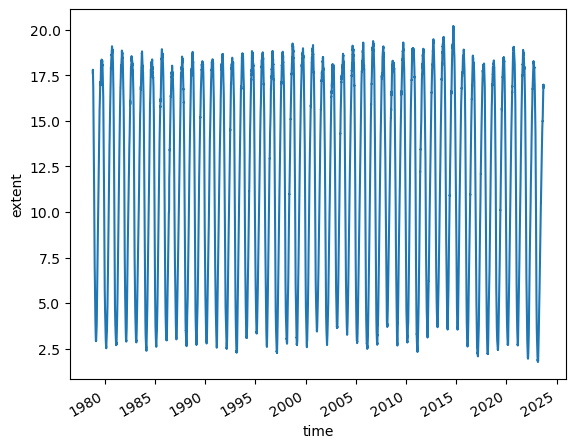

In [8]:
sie_da.plot()

# sea ice extent

In [9]:
sie_mean_da=sie_da.sel(time=CLIMAT_SLICE).groupby('time.dayofyear').mean()

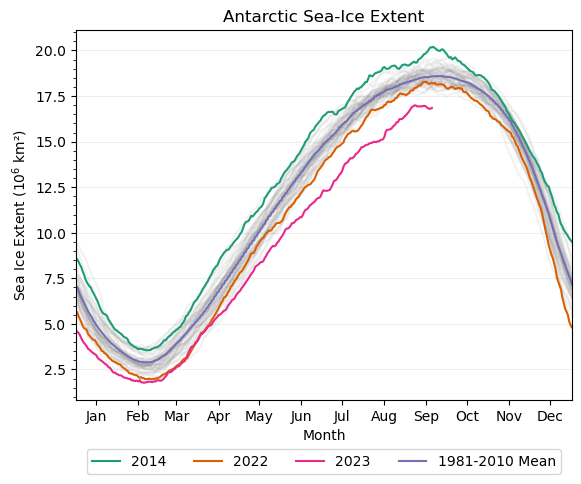

In [20]:
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DOY_MID_MONTH=[15,46,74,105,135,166,196,227,258,288,319,349]


years_list=np.unique(sie_da.time.dt.year)[1:]

#all the years in grey
for iYear in years_list:
    i_da=sie_da.sel(
        time=sie_da.time.dt.year.isin(iYear)
        )
    
    if (iYear==HIGH_YEAR):
        c='#1b9e77'
        a=1
        l=str(HIGH_YEAR)
    elif (iYear==LOW_YEAR):
        c='#d95f02'
        a=1
        l=str(LOW_YEAR)
    elif (iYear==YEAR):
        c='#e7298a'
        a=1
        l=YEAR
    else:
        c='grey'
        a=0.1
        l=None
    
    plt.plot(
        i_da.time.dt.dayofyear,
        i_da,
        alpha=a,
        color=c,
        label=l
    )
    
#mean
sie_mean_da.plot(label='1981-2010 Mean', color='#7570b3')

ax=plt.gca()
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
plt.grid(visible=True, which='major', axis='y', linestyle='-', alpha=0.2)

# plt.yticks(
#     ticks=[0, 5e6, 10e6, 15e6, 20e6],
#     labels=['0','5','10','15','20']
# )
plt.ylabel('Sea Ice Extent (10$^{6}$ km\u00b2)')
plt.xticks(
    ticks=DOY_MID_MONTH,
    labels=MONTHS
)
plt.xlabel('Month')
plt.xlim(0,365)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=4)

plt.title('Antarctic Sea-Ice Extent')
plt.show()